In [2]:
# Importing the libraries
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# Loading the dataset
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

X_train=X_train.reshape(-1,784)/255.0
X_test=X_test.reshape(-1,784)/255.0

In [4]:
# Get the mean images for each class
mean_images = []
for i in range(10):
    mean_images.append(X_train[y_train == i].mean(axis=0))
mean_images = np.array(mean_images)
mean_images = mean_images.T

In [5]:
# Get the mean vector
mean_vector = np.mean(mean_images,axis = 1)

In [6]:
# Get the mean array (All the columns are mean vectors)
mean_array = np.ones([784,10])
for i in range(10):
  mean_array[:,i] = mean_vector

In [7]:
# Find the mean centered array
mean_centered_array = mean_images-mean_array

# Compute the covariance matrix
covariance_matrix = np.matmul(mean_centered_array,mean_centered_array.T)

In [8]:
# Get the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

# Sort the eigenvalues and eigenvectors
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

In [9]:
# Get the first k eigenvectors
k = 84
eigenvectors = eigenvectors[:,0:k]

In [10]:
# Project the data onto the eigenvectors
projected_data = np.matmul(eigenvectors.T,mean_centered_array)

In [11]:
# Function to project the image onto the eigenvectors
def project(image_vector):
  return np.matmul(eigenvectors.T,image_vector)

In [12]:
# Function to reconstruct the image from the projected data
def reconstruct(image_reduced_vector):
    return np.matmul(eigenvectors,image_reduced_vector)+mean_vector

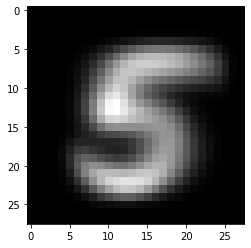

In [13]:
# Plot a sample reconstructed image
reduced = projected_data[:,5]
reduced = reconstruct(reduced)
plt.imshow(reduced.reshape(28,28)*255,cmap='gray')

In [14]:
# Function to predict the class of the image
def predict(image_vector):
    image = project(image_vector)
    min_dist = np.sum(np.square(projected_data[:,0]-image))
    predicted = 0
    for i in range(10):
        dist = np.sum(np.square(projected_data[:,i]-image))
        if dist < min_dist:
            min_dist = dist
            predicted = i
    return predicted

In [15]:
# Function to plot the image and the predicted image
def predict_plot(index,supress_print=False):
    image = X_test[index]
    label = y_test[index]
    fig,ax = plt.subplots(1,2)
    ax[0].imshow(image.reshape(28,28),cmap='gray')
    ax[0].set_title(f"Chosen digit: {label}")
    image = image.reshape(-1)
    image = project(image)
    min_dist = np.sum(np.square(projected_data[:,0]-image))
    predicted = 0
    for i in range(10):
        dist = np.sum(np.square(projected_data[:,i]-image))
        if not supress_print:
            print(f"Distance from {i}: {dist}")
        if dist < min_dist:
            min_dist = dist
            predicted = i
    ax[1].imshow(reconstruct(projected_data[:,predicted]*255).reshape(28,28),cmap='gray')
    ax[1].set_title(f"Predicted digit: {predicted}")
    plt.show()


In [16]:
# Find the accuracy of the model
predicted = np.array([predict(image) for image in X_test])
correct = np.sum(predicted==y_test)
print(f"Test Accuracy: {correct/len(y_test)}")

predicted = np.array([predict(image) for image in X_train])
correct = np.sum(predicted==y_train)
print(f"Train Accuracy: {correct/len(y_train)}")

Accuracy: 0.5729
Accuracy: 0.5614166666666667


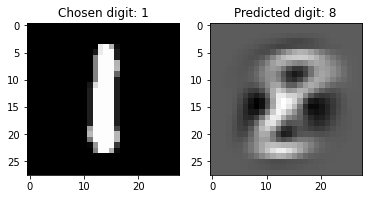

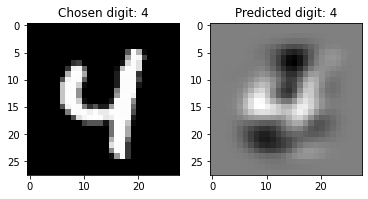

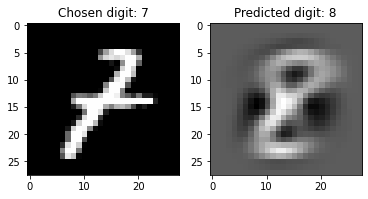

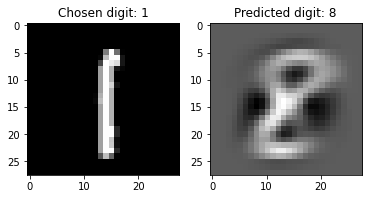

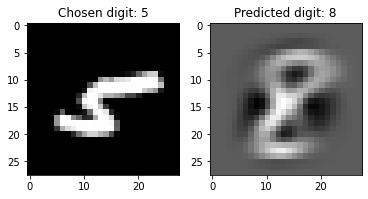

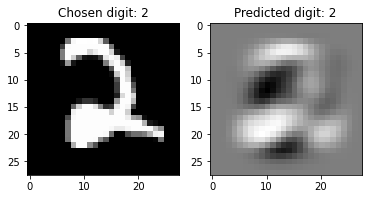

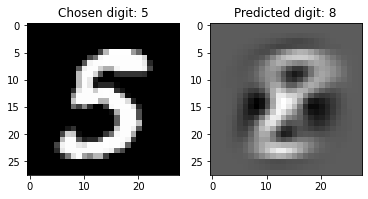

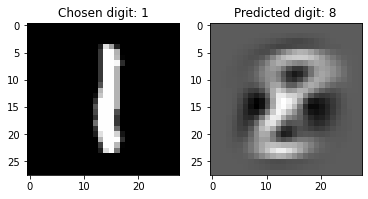

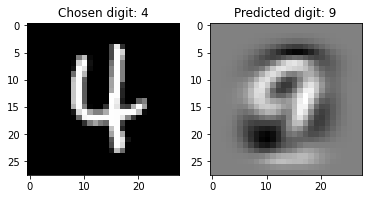

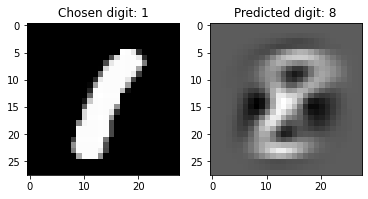

In [17]:
# Plot some random images
for i in range(10):
    num = np.random.randint(0,10000)
    predict_plot(num,True)

In [18]:
# Save the projected data
np.save('projected_data.npy',projected_data)

# Save the mean vector
np.save('mean_vector.npy',mean_vector)

# Save the eigenvectors
np.save('eigenvectors.npy',eigenvectors)